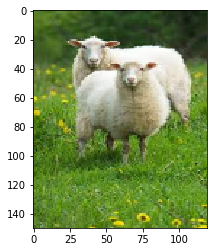

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import cv2
import time
%matplotlib inline
image = cv2.resize(cv2.cvtColor(cv2.imread('images/sheep.jpeg'), cv2.COLOR_BGR2RGB), (120, 150))
plt.imshow(image)
plt.show()

In [8]:
class KMeansImageSegmentation():
    def __init__(self, K):
        self.k = K
        
        
    @classmethod
    def error(self, image, centroids):
        err = 0
        for x in range(image.shape[0]):
            for y in range(image.shape[1]):
                distances = [np.linalg.norm(image[x][y]-centroids[i]) for i in range(centroids.shape[0])]
                classification = np.argmin(distances)
                err += (image[x][y]-centroids[classification])**2
        return sum(err)
    
    
    @classmethod
    def segment(self, image, centroids):
        blank_image = np.zeros((image.shape[0], image.shape[1], 3))
        blank_image.fill(255)
        for x in range(image.shape[0]):
            for y in range(image.shape[1]):
                distances = [np.linalg.norm(image[x][y]-centroid) for centroid in centroids]
                classification = np.argmin(distances)
                
                blank_image[x][y] = centroids[classification].copy()
        blank_image = blank_image.astype(int)
        return blank_image
        
    def fit(self, image, trials=2):
        trial_errors = []
        trial_results = []
        now = time.time()
        
        for trial in range(trials):
            centroids = np.random.randint(0, 256, (self.k, 3))
            prev_centroids = [-1]

            while (not all(item == True for item in (prev_centroids==centroids).flatten())):
                prev_centroids = centroids.copy()
                centroid_neighbors = np.zeros(self.k)
                new_centroids = np.zeros((self.k, 3))

                for x in range(image.shape[0]):
                    for y in range(image.shape[1]):
                        distances = [np.linalg.norm(image[x][y]-centroids[i]) for i in range(centroids.shape[0])]
                        classification = np.argmin(distances)

                        new_centroids[classification] += image[x][y]
                        centroid_neighbors[classification] += 1
                
                for i, centroid in enumerate(new_centroids):
                    if centroid_neighbors[i] != 0:
                        centroids[i] = new_centroids[i]/centroid_neighbors[i]
                    else:
                        centroids[i] = [0, 0, 0]

                trial_results.append(centroids)
                trial_errors.append(self.error(image, centroids)) 
        segmented_image = self.segment(image, trial_results[np.argmin(trial_errors)])
        plt.suptitle('Finished in {0} secs'.format(time.time()-now))
        plt.imshow(segmented_image)
        plt.savefig('images/sheep.jpeg')
        plt.show()

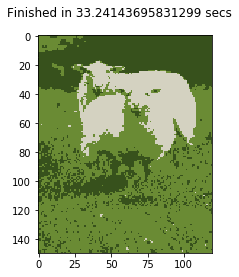

In [9]:
kmeans = KMeansImageSegmentation(3) # 5 represents the number of colors or "centroids" we find
kmeans.fit(image)